In [1]:
# Importations

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
# Extracting and splitting data in train and test subsets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Normalization of the pixel values (between 0 and 1)

X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

In [4]:
# Applying One Hot Encoder in the output labels

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [5]:
# Splitting train set into validation subset

train_X, valid_X, train_y, valid_y = train_test_split(X_train, 
                                                      Y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 13)

In [6]:
# Model construction

# Sequential model selection
cifar10_model = models.Sequential()

# Layers selection

# Convolutional layers

cifar10_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), 
                                padding = "same", activation = "linear", 
                                input_shape = (32, 32, 3)))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))
cifar10_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))

cifar10_model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = "same"))
cifar10_model.add(layers.Dropout(0.20))


cifar10_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))
cifar10_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))

cifar10_model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = "same"))
cifar10_model.add(layers.Dropout(0.20))


cifar10_model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))
cifar10_model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))
cifar10_model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), 
                                padding = "same", activation = "linear"))
cifar10_model.add(layers.LeakyReLU(alpha=0.1))

cifar10_model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = "same"))
cifar10_model.add(layers.Dropout(0.20))


# Flatten layer
cifar10_model.add(layers.Flatten())


# Dense layers
cifar10_model.add(layers.Dense(256, activation = "relu"))
cifar10_model.add(layers.Dense(128, activation = "relu"))


# Output layer: Softmax for multiple clasiffication
cifar10_model.add(layers.Dense(10, activation = "softmax"))

cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [7]:
# Compiling the model

cifar10_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = optimizers.Adam(learning_rate=0.001),
                      metrics = ["accuracy"])

In [8]:
# Fitting the model and validating it

history = cifar10_model.fit(train_X, train_y, 
                            epochs = 10, batch_size = 100, 
                            validation_data = (valid_X, valid_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 34s 855us/step - loss: 1.6448 - accuracy: 0.3882 - val_loss: 1.1673 - val_accuracy: 0.5789
Epoch 2/10
40000/40000 [==============================] - 32s 800us/step - loss: 1.0610 - accuracy: 0.6233 - val_loss: 0.9610 - val_accuracy: 0.6661
Epoch 3/10
40000/40000 [==============================] - 32s 798us/step - loss: 0.8110 - accuracy: 0.7164 - val_loss: 0.7550 - val_accuracy: 0.7345
Epoch 4/10
40000/40000 [==============================] - 32s 798us/step - loss: 0.6637 - accuracy: 0.7703 - val_loss: 0.6440 - val_accuracy: 0.7785
Epoch 5/10
40000/40000 [==============================] - 32s 799us/step - loss: 0.5545 - accuracy: 0.8058 - val_loss: 0.6387 - val_accuracy: 0.7833
Epoch 6/10
40000/40000 [==============================] - 32s 800us/step - loss: 0.4683 - accuracy: 0.8364 - val_loss: 0.6455 - val_accuracy: 0.7975
Epoch 7/10
40000/40000 [==============================] 

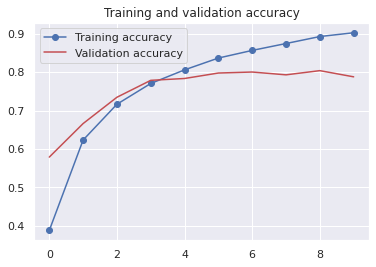

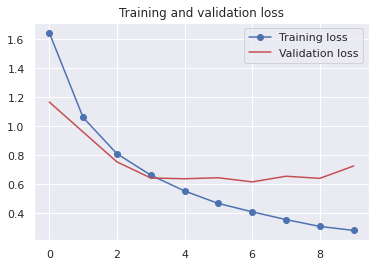

In [9]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Evaluating the model with the test subset

test_loss, test_acc = cifar10_model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 4s 376us/step


In [11]:
# Model's accuracy

test_acc

0.7821000218391418